<a href="https://colab.research.google.com/github/Aryan9012004/Machine_Learning/blob/main/P7(Car_Price_Prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Price Prediction using Linear & Lasso Regression

Importing The Dependenies

Here we have 2 models :-
1. Linear Regression (Better for positive correlation / Direct proportional)
2. Lasso Regression(Better for Negetive correlation / Inverse proportional)

Here we find out the accuracy score of both the models and then compare them with each other to get best accuracy possible

regression problems are those where we predict a particular value on which our data can be used

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics # Used to find accuracy score , error score , etc

Data Collection and Processing

In [5]:
# loading the data from csv file to pandas dataFrame
car_data = pd.read_csv("/content/car data.csv")

In [6]:
# First 5 rows and columns
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
# Number of rows and columns
car_data.shape

(301, 9)

In [10]:
# Checking the number of missing values
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
# Getting additional information about the data
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [13]:
# Checking the distribution of the categorical data
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Text Encoding

In [14]:
car_data.replace({"Fuel_Type":{"Petrol":0 , "Diesel":1 , "CNG":2}},inplace=True)
car_data.replace({"Seller_Type":{"Dealer":0 , "Individual":1}},inplace=True)
car_data.replace({"Transmission":{"Manual":0 , "Automatic":1}},inplace=True)

In [15]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data & Target

In [16]:
X = car_data.drop(['Car_Name',"Selling_Price"],axis=1)
Y = car_data['Selling_Price']

In [17]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [18]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting training & test data

In [19]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

Model Training

1. Linear Regression

In [20]:
# Loading the training data with linear regression model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [21]:
# Prediction on Training data
training_data_pred = lin_reg_model.predict(X_train)

In [33]:
# r squared Error
error_score = metrics.r2_score(Y_train,training_data_pred)

In [34]:
print(error_score)

0.8799451660493711


In [36]:
print("R squared error is : ",error_score)

R squared error is :  0.8799451660493711


Visualize the actual price and predicted price

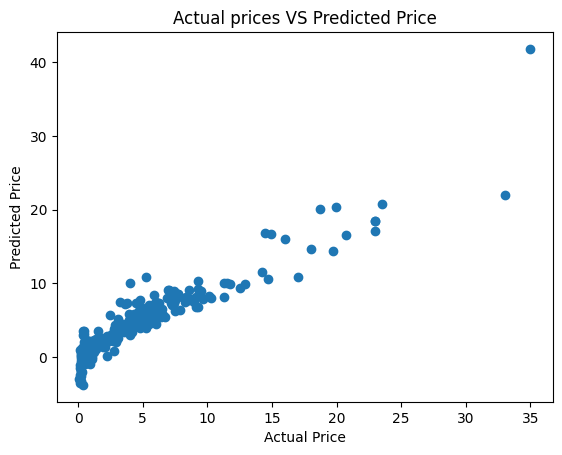

In [37]:
plt.scatter(Y_train,training_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual prices VS Predicted Price")
plt.show()

In [29]:
# Prediction on Test data
test_data_pred = lin_reg_model.predict(X_test)

In [31]:
# r squared Error
error_score_test = metrics.r2_score(Y_test,test_data_pred)

In [32]:
print("R squared error is : ",error_score_test)

R squared error is :  0.8365766715027051


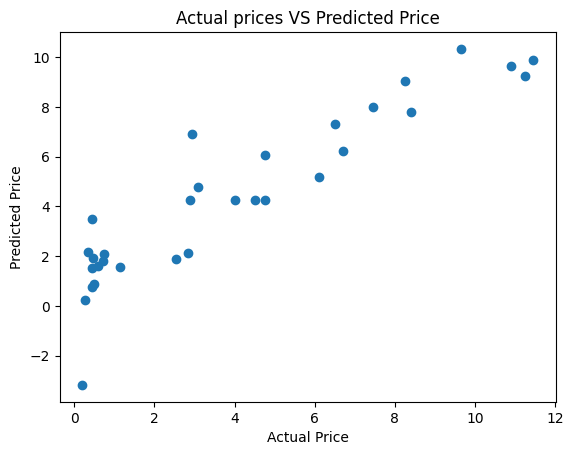

In [38]:
plt.scatter(Y_test,test_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual prices VS Predicted Price")
plt.show()

2. Lasso Regression

In [39]:
# Loading the training data with linear regression model
las_reg_model = Lasso()
las_reg_model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [40]:
# Prediction on Training data
training_data_pred_las = las_reg_model.predict(X_train)

In [41]:
# r squared Error
error_score_las = metrics.r2_score(Y_train,training_data_pred_las)

In [42]:
print(error_score_las)

0.8427856123435794


In [43]:
print("R squared error is : ",error_score_las)

R squared error is :  0.8427856123435794


Visualize the actual price and predicted price

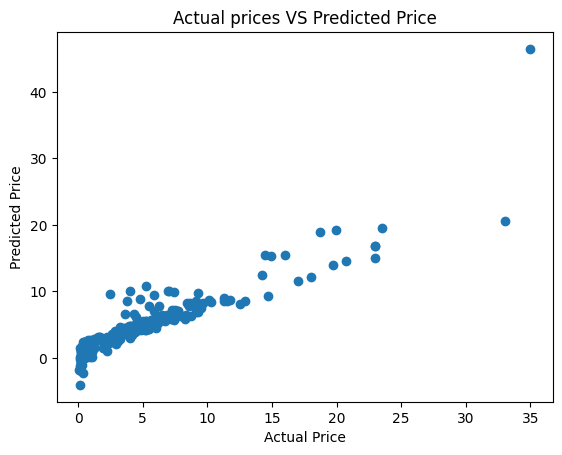

In [44]:
plt.scatter(Y_train,training_data_pred_las)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual prices VS Predicted Price")
plt.show()

In [45]:
# Prediction on Test data
test_data_pred_las = las_reg_model.predict(X_test)

In [46]:
# r squared Error
error_score_test_las = metrics.r2_score(Y_test,test_data_pred_las)

In [47]:
print("R squared error is : ",error_score_test_las)

R squared error is :  0.8709167941173195


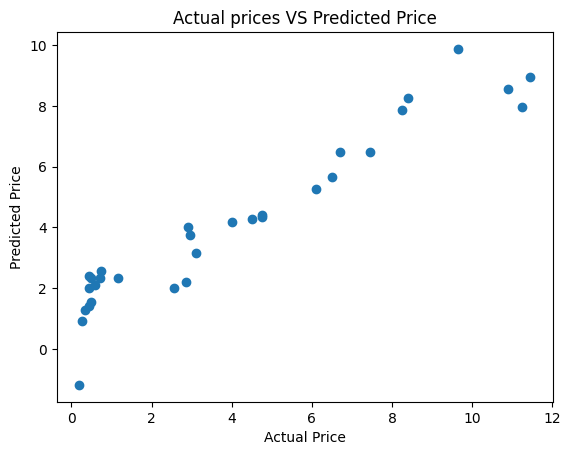

In [48]:
plt.scatter(Y_test,test_data_pred_las)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual prices VS Predicted Price")
plt.show()